<center>
    <img src="https://cdn.ticbeat.com/src/uploads/2020/08/machine-learning-mooc-810x540.jpg" width="500" />
</center>

# Regresión polinomial

Tiempo estimado: **2** horas

## Objetivos

Al finalizar podrás:
-   Identificar un modelo polinomial
-   Hacer uso de un modelo polimomial


### Importando las librerías necesarias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Descargar los datos
Usaremos !wget para descargar el archivo desde IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-05-28 15:50:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   362KB/s    in 0.2s    

2021-05-28 15:50:50 (362 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Características a analizar

### `FuelConsumption.csv`:

[Fuente original](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Visualizar los datos


In [4]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Seleccionamos algunas características de nuestro dataset.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Grafiquemos

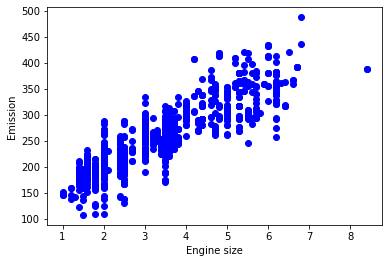

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Train/test

Dividamos 80% en train y 20% en test.

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Regresión polinomial

Cuando el comportamiento de los datos no es propiamente lineal (que puede verificarse mediante la gráfica) podemos usar otro tipo de aproximación un poco más general, un modelo polinomial. 

Un modelo polinomial de grado (n) es de la forma

$$y=\sum_{i=0}^{n} a_n x^n = a_0+a_1x+a_2 x^2+ \dots +an x^n$$

Si n=1 entonces es lineal, si n=2, es cuadrático, si n=3, cúbico, etc.

Ahora, la pregunta es: ¿cómo podemos ajustar nuestros datos en esta ecuación mientras solo tenemos valores x, como **Enginesize**?
Bueno, podemos crear algunas características adicionales: 1, $ x $ y $ x ^ 2 $.

La función **PolynomialFeatures ()** de scikit-learn, impulsa un nuevo conjunto de características del conjunto de características original. Es decir, se generará una matriz que consta de todas las combinaciones polinomiales de las características con grado menor o igual al grado especificado. Por ejemplo, digamos que el conjunto de características original tiene solo una característica, _ENGINESIZE_. Ahora, si seleccionamos el grado del polinomio para que sea 2, entonces genera 3 características, degree = 0, degree = 1 y degree = 2:

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)# transform an element [x1]--> [1,x1,x1^2], ex. [3]-->[1,3, 9]

In [33]:
a=np.asanyarray([[2],[3],[4]])
a.shape
print('De la forma matricial: ')
print('\n 1 x1 x1^2 \n 1 x2 x2^2 \n 1 x3 x3^2\n')
poly.fit_transform(a)

De la forma matricial: 

 1 x1 x1^2 
 1 x2 x2^2 
 1 x3 x3^2



array([[ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

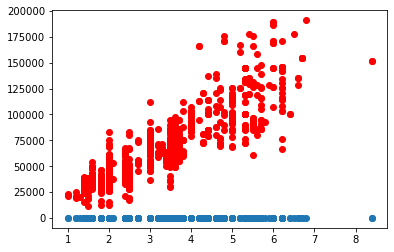

In [29]:
plt.scatter(train_x, train_y)
plt.scatter(train_x, train_y*train_y, c='r')
#plt.scatter(train_x_poly[:,2], train_y)

La función **fit_transform** genera la siguiente matriz:

$$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
     1 & v_1 & v_1^2\\
     1 & v_2 & v_2^2\\
    \vdots & \vdots & \vdots\\
     1 & v_n & v_n^2
\end{bmatrix}\longrightarrow 
\begin{bmatrix}
     1 & v_1 & v_1^2\\
     1 & v_2 & v_2^2\\
    \vdots & \vdots & \vdots\\
     1 & v_n & v_n^2
\end{bmatrix} 
\begin{bmatrix}
     a_0\\
     a_1\\
     a_2
\end{bmatrix}=
\begin{bmatrix}
     a_0 + a_1 v_1 + a_2 v_1^2\\
     a_0 + a_1 v_2 + a_2 v_3^2\\
    \vdots \\
     a_0 + a_1 v_n + a_2 v_n^2
\end{bmatrix}
$$

y de manera numérica:

$$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
     1 & 2. & 4.\\
     1 & 2.4 & 5.76\\
     1 & 1.5 & 2.25\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$$


Regresión polinomial es un caso especial de regresión lineal, con la idea principal de cómo se seleccionan las características. Si reemplazamos $x$ por $x_1$, $x^2$ por $x_2$, etc. Entonce dicha ecuación de grado 2 se transforma en

$$y = a_0 + a_1  x_1 + a_2 x_2$$

Con lo que ahora podemos abordar el problema como un problema de regresión lineal y usamos **LinearRegression()**.


In [34]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.54149926 -1.50410225]]
Intercept:  [106.77331152]


In [40]:
print('a_0: ',clf.intercept_[0])
print('a_1: ',clf.coef_[0][1])
print('a_2: ',clf.coef_[0][2])

a_0:  106.77331152126425
a_1:  50.541499258172365
a_2:  -1.5041022487753999


Text(0, 0.5, 'Emission')

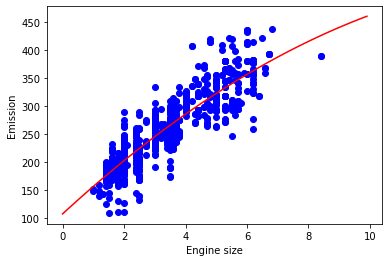

In [41]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluación del modelo

In [42]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
y_hat = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,y_hat ) )

Mean absolute error: 24.61
Residual sum of squares (MSE): 1053.69
R2-score: 0.74


### Actividad

Realiza un modelo con regresión polinomial de grado 3: Modela y evalúa el modelo

Coefficients:  [[ 0.         24.77896689  5.94740689 -0.65425278]]
Intercept:  [133.90994359]
Mean absolute error: 25.11
Residual sum of squares (MSE): 1085.39
R2-score: 0.76


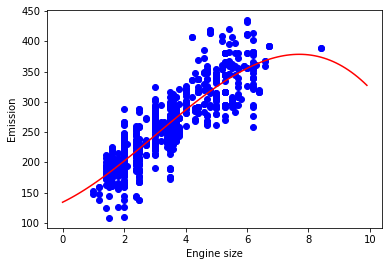

In [13]:
# write your code here
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

<details><summary>Click here for the solution</summary>

```python
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )

```

</details>
